In [1]:
install.packages("FSelector")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘RWeka’




In [2]:
library("readxl")
library(writexl)

In [3]:
# Memasukkan Data
df <- read_excel("/kaggle/input/dataset-penduduk/Dataset/DataPenduduk.xlsx")
df

No  Jenis_Kelamin Usia Anggota_Keluarga Pendidikan_Terakhir
1    1  Laki-Laki     28   2                SMP                
2    2  Laki-Laki     44   2                Tidak Sekolah      
3    3  Laki-Laki     73   1                Tidak Sekolah      
4    4  Laki-Laki     36   3                SD                 
5    5  Laki-Laki     45   6                SD                 
6    6  Laki-Laki     30   3                SMA                
7    7  Laki-Laki     31   3                SMP                
8    8  Laki-Laki     24   2                SMP                
9    9  Laki-Laki     55   2                Tidak Sekolah      
10  10  Perempuan     43   1                SMP                
11  11  Laki-Laki     58   1                SD                 
12  12  Laki-Laki     48   4                SD                 
13  13  Laki-Laki     39   4                SD                 
14  14  Laki-Laki     25   2                SMA                
15  15  Laki-Laki     50   4                SD                 
16  16  Laki-Laki     41   3                SD                 
17  17  Perempuan     27   2                SMP                
18  18  Laki-Laki     46   4                SMP                
19  19  Laki-Laki     55   4                Tidak Sekolah      
20  20  Laki-Laki     46   1                SD                 
21  21  Perempuan     50   3                Tidak Sekolah      
22  22  Laki-Laki     63   2                Tidak Sekolah      
23  23  Laki-Laki     32   1                SMA                
24  24  Laki-Laki     31   4                SMA                
25  25  Laki-Laki     52   4                SMP                
26  26  Laki-Laki     29   3                SMA                
27  27  Perempuan     73   3                Tidak Sekolah      
28  28  Perempuan     63   1                Tidak Sekolah      
29  29  Laki-Laki     43   4                Tidak Sekolah      
30  30  Laki-Laki     45   4                SD                 
⋮   ⋮   ⋮             ⋮    ⋮                ⋮                  
446 446 Laki-Laki     41   4                SMA                
447 447 Laki-Laki     73   2                Tidak Sekolah      
448 448 Laki-Laki     60   3                Tidak Sekolah      
449 449 Laki-Laki     31   3                SMP                
450 450 Laki-Laki     62   3                SD                 
451 451 Laki-Laki     45   4                SD                 
452 452 Laki-Laki     44   5                SMA                
453 453 Laki-Laki     33   3                SMA                
454 454 Laki-Laki     32   3                SMA                
455 455 Laki-Laki     47   4                SD                 
456 456 Laki-Laki     57   5                SMP                
457 457 Laki-Laki     61   2                SMA                
458 458 Laki-Laki     45   4                SMP                
459 459 Perempuan     55   2                SD                 
460 460 Laki-Laki     37   3                SMP                
461 461 Laki-Laki     64   2                Tidak Sekolah      
462 462 Laki-Laki     32   3                Tidak Sekolah      
463 463 Laki-Laki     43   5                SMA                
464 464 Laki-Laki     38   4                SD                 
465 465 Laki-Laki     63   2                SD                 
466 466 Laki-Laki     35   5                SMP                
467 467 Laki-Laki     43   3                SMA                
468 468 Laki-Laki     37   2                SMP                
469 469 Laki-Laki     59   2                Tidak Sekolah      
470 470 Laki-Laki     39   1                Tidak Sekolah      
471 471 Laki-Laki     29   2                SMP                
472 472 Laki-Laki     38   4                SD                 
473 473 Perempuan     70   2                Tidak Sekolah      
474 474 Laki-Laki     58   3                Tidak Sekolah      
475 475 Laki-Laki     48   4                SD                 
    Pekerjaan          Penghasilan K

# **Preprocessing**

Saving 12.5 x 6.67 in image


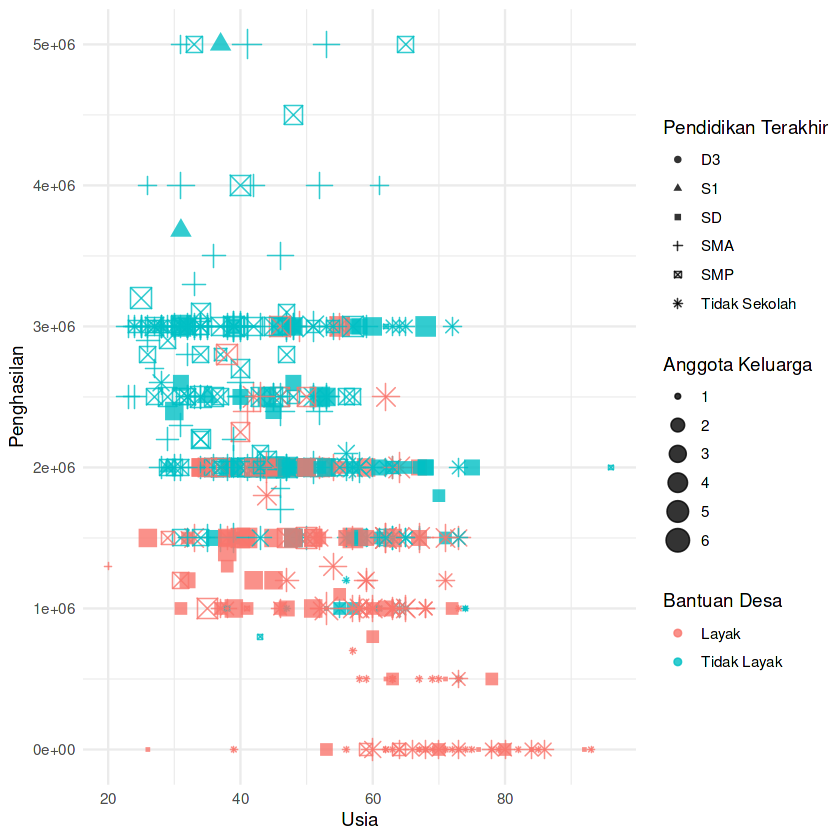

In [4]:
library(ggplot2)

ggplot(df,
       aes(x = Usia,
           y = Penghasilan,
           color = Bantuan_Desa,
           shape = Pendidikan_Terakhir,
          size = Anggota_Keluarga))+
    geom_point(alpha = .8)+
theme_minimal()+
labs(x = "Usia",
     y = "Penghasilan",
     color = "Bantuan Desa",
     size = "Anggota Keluarga",
    shape = "Pendidikan Terakhir")
ggsave("ggplot.png")

In [5]:
str(df)

tibble [475 × 14] (S3: tbl_df/tbl/data.frame)
 $ No                   : num [1:475] 1 2 3 4 5 6 7 8 9 10 ...
 $ Jenis_Kelamin        : chr [1:475] "Laki-Laki" "Laki-Laki" "Laki-Laki" "Laki-Laki" ...
 $ Usia                 : num [1:475] 28 44 73 36 45 30 31 24 55 43 ...
 $ Anggota_Keluarga     : num [1:475] 2 2 1 3 6 3 3 2 2 1 ...
 $ Pendidikan_Terakhir  : chr [1:475] "SMP" "Tidak Sekolah" "Tidak Sekolah" "SD" ...
 $ Pekerjaan            : chr [1:475] "Satpam" "Buruh Harian Lepas" "Tidak Bekerja" "Buruh Harian Lepas" ...
 $ Penghasilan          : num [1:475] 3000000 2000000 500000 1500000 2000000 3000000 2000000 3000000 1000000 800000 ...
 $ Kepemilikan_Rumah    : chr [1:475] "Milik Orang tua" "Milik Sendiri" "Milik Keluarga" "Milik Sendiri" ...
 $ Dinding              : chr [1:475] "Tembok" "Kayu" "Kayu" "Kayu" ...
 $ Lantai               : chr [1:475] "Keramik" "Tanah" "Tanah" "Tanah" ...
 $ Aset_Tanah           : chr [1:475] "Tidak ada" "0,1 - 0,2 ha" "Tidak ada" "0,1 - 0,2 ha" ...


In [6]:
df$Bantuan_Desa <- as.factor(df$Bantuan_Desa)
df$Jenis_Kelamin <- as.factor(df$Jenis_Kelamin)

df$Usia <- cut(df$Usia, breaks = seq(from = 0, to = 100, by = 25), include.lowest = TRUE, labels = c('0-24', '25-49', '50-74', '75-99'))
df$Anggota_Keluarga <- cut(df$Anggota_Keluarga, breaks = seq(from = 0, to = 6, by = 1), include.lowest = TRUE, labels = c('1', '2', '3', '4', '5', '6+'))

df$Pendidikan_Terakhir <- as.factor(df$Pendidikan_Terakhir)
df$Pekerjaan <- as.factor(df$Pekerjaan)

df$Penghasilan <- cut(df$Penghasilan, breaks = c(seq(from = 0, to = 5000000, by = 500000), Inf), include.lowest = TRUE, right = FALSE, labels = c('0-499.999', '500.000-999.999', '1.000.000-1.499.999', '1.500.000-1.999.999', '2.000.000-2.499.999', '2.500.000-2.999.999', '3.000.000-3.499.999', '3.500.000-3.999.999', '4.000.000-4.499.999', '4.500.000-4.999.999', '5.000.000+'))
df$Kepemilikan_Rumah <- as.factor(df$Kepemilikan_Rumah)
df$Dinding <- as.factor(df$Dinding)
df$Lantai <- as.factor(df$Lantai)

df$Aset_Tanah <- factor(df$Aset_Tanah, levels = c('1,0 - 5,0 ha', '0,9 - 1,0 ha','0,7 - 0,8 ha', '0,6 - 0,7 ha', '0,5 - 0,6 ha', '0,4 - 0,5 ha', '0,3 - 0,4 ha', '0,2 - 0,3 ha', '0,1 - 0,2 ha', 'Tidak ada'), labels = c('1.0-5.0', '0.9-1.0','0.7-0.8', '0.6-0.7', '0.5-0.6', '0.4-0.5', '0.3-0.4', '0.2-0.3', '0.1-0.2', '0-0.1'))

df$Aset_Lainnya <- factor(df$Aset_Lainnya, levels = c('Tidak Ada', 'Elektronik', 'Elektronik/Sepeda Motor', 'Elektronik/Mobil', 'Elektronik/Sepeda Motor/Mobil'),labels = c('Tidak Ada', 'Elektronik', 'Sepeda Motor', 'Mobil', 'Sepeda Motor dan Mobil'))
df$Perilaku_Hidup_Bersih <- as.factor(df$Perilaku_Hidup_Bersih)


str(df)

tibble [475 × 14] (S3: tbl_df/tbl/data.frame)
 $ No                   : num [1:475] 1 2 3 4 5 6 7 8 9 10 ...
 $ Jenis_Kelamin        : Factor w/ 2 levels "Laki-Laki","Perempuan": 1 1 1 1 1 1 1 1 1 2 ...
 $ Usia                 : Factor w/ 4 levels "0-24","25-49",..: 2 2 3 2 2 2 2 1 3 2 ...
 $ Anggota_Keluarga     : Factor w/ 6 levels "1","2","3","4",..: 2 2 1 3 6 3 3 2 2 1 ...
 $ Pendidikan_Terakhir  : Factor w/ 6 levels "D3","S1","SD",..: 5 6 6 3 3 4 5 5 6 5 ...
 $ Pekerjaan            : Factor w/ 19 levels "Buruh Harian Lepas",..: 13 1 15 1 1 3 1 3 1 1 ...
 $ Penghasilan          : Factor w/ 11 levels "0-499.999","500.000-999.999",..: 7 5 2 4 5 7 5 7 3 2 ...
 $ Kepemilikan_Rumah    : Factor w/ 5 levels "Milik Keluarga",..: 2 3 1 3 3 3 2 3 3 3 ...
 $ Dinding              : Factor w/ 2 levels "Kayu","Tembok": 2 1 1 1 1 2 1 2 1 1 ...
 $ Lantai               : Factor w/ 3 levels "Keramik","Semen",..: 1 3 3 3 1 1 3 1 3 3 ...
 $ Aset_Tanah           : Factor w/ 10 levels "1.0-5.0","0.9-1.0

Layak Tidak Layak 
        177         298

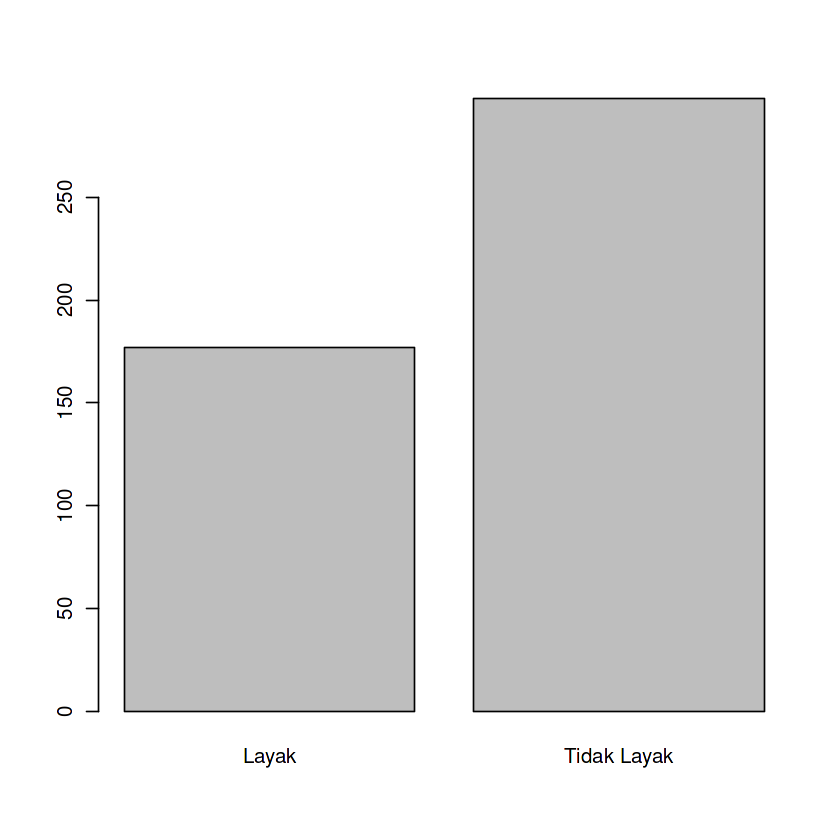

In [7]:
summary(df$Bantuan_Desa)
plot(df$Bantuan_Desa) 

In [8]:
write_xlsx(df, "dataset_penelitian.xlsx")

# **Pohon Keputusan C5.0**

In [9]:
input_columns <- c("Jenis_Kelamin", "Usia", "Anggota_Keluarga", 
                   "Pendidikan_Terakhir", "Pekerjaan", "Penghasilan", 
                   "Kepemilikan_Rumah", "Dinding", "Lantai", "Aset_Tanah", "Aset_Lainnya", "Perilaku_Hidup_Bersih")
datafeed <- df[ , input_columns ]
str(datafeed)


tibble [475 × 12] (S3: tbl_df/tbl/data.frame)
 $ Jenis_Kelamin        : Factor w/ 2 levels "Laki-Laki","Perempuan": 1 1 1 1 1 1 1 1 1 2 ...
 $ Usia                 : Factor w/ 4 levels "0-24","25-49",..: 2 2 3 2 2 2 2 1 3 2 ...
 $ Anggota_Keluarga     : Factor w/ 6 levels "1","2","3","4",..: 2 2 1 3 6 3 3 2 2 1 ...
 $ Pendidikan_Terakhir  : Factor w/ 6 levels "D3","S1","SD",..: 5 6 6 3 3 4 5 5 6 5 ...
 $ Pekerjaan            : Factor w/ 19 levels "Buruh Harian Lepas",..: 13 1 15 1 1 3 1 3 1 1 ...
 $ Penghasilan          : Factor w/ 11 levels "0-499.999","500.000-999.999",..: 7 5 2 4 5 7 5 7 3 2 ...
 $ Kepemilikan_Rumah    : Factor w/ 5 levels "Milik Keluarga",..: 2 3 1 3 3 3 2 3 3 3 ...
 $ Dinding              : Factor w/ 2 levels "Kayu","Tembok": 2 1 1 1 1 2 1 2 1 1 ...
 $ Lantai               : Factor w/ 3 levels "Keramik","Semen",..: 1 3 3 3 1 1 3 1 3 3 ...
 $ Aset_Tanah           : Factor w/ 10 levels "1.0-5.0","0.9-1.0",..: 10 9 10 9 9 9 10 9 8 9 ...
 $ Aset_Lainnya         : Fact

In [10]:
head(datafeed)

Jenis_Kelamin Usia  Anggota_Keluarga Pendidikan_Terakhir Pekerjaan         
1 Laki-Laki     25-49 2                SMP                 Satpam            
2 Laki-Laki     25-49 2                Tidak Sekolah       Buruh Harian Lepas
3 Laki-Laki     50-74 1                Tidak Sekolah       Tidak Bekerja     
4 Laki-Laki     25-49 3                SD                  Buruh Harian Lepas
5 Laki-Laki     25-49 6+               SD                  Buruh Harian Lepas
6 Laki-Laki     25-49 3                SMA                 Karyawan Swasta   
  Penghasilan         Kepemilikan_Rumah Dinding Lantai  Aset_Tanah Aset_Lainnya
1 3.000.000-3.499.999 Milik Orang tua   Tembok  Keramik 0-0.1      Sepeda Motor
2 2.000.000-2.499.999 Milik Sendiri     Kayu    Tanah   0.1-0.2    Sepeda Motor
3 500.000-999.999     Milik Keluarga    Kayu    Tanah   0-0.1      Tidak Ada   
4 1.500.000-1.999.999 Milik Sendiri     Kayu    Tanah   0.1-0.2    Sepeda Motor
5 2.000.000-2.499.999 Milik Sendiri     Kayu    Keramik 0.1-0.2    Sepeda Motor
6 3.000.000-3.499.999 Milik Sendiri     Tembok  Keramik 0.1-0.2    Sepeda Motor
  Perilaku_Hidup_Bersih
1 Memiliki WC          
2 Memiliki WC          
3 Memiliki WC Darurat  
4 Memiliki WC          
5 Memiliki WC          
6 Memiliki WC

In [11]:
set.seed(100)
indeks_training <- sample(c(TRUE, FALSE), nrow(df), replace=TRUE, prob=c(0.90,0.10))

In [12]:
data_training <- datafeed[indeks_training,]
class_training <- df[indeks_training,]$Bantuan_Desa
data_testing <- datafeed[!indeks_training,]
str(data_training)

tibble [424 × 12] (S3: tbl_df/tbl/data.frame)
 $ Jenis_Kelamin        : Factor w/ 2 levels "Laki-Laki","Perempuan": 1 1 1 1 1 1 1 1 1 2 ...
 $ Usia                 : Factor w/ 4 levels "0-24","25-49",..: 2 2 3 2 2 2 2 1 3 2 ...
 $ Anggota_Keluarga     : Factor w/ 6 levels "1","2","3","4",..: 2 2 1 3 6 3 3 2 2 1 ...
 $ Pendidikan_Terakhir  : Factor w/ 6 levels "D3","S1","SD",..: 5 6 6 3 3 4 5 5 6 5 ...
 $ Pekerjaan            : Factor w/ 19 levels "Buruh Harian Lepas",..: 13 1 15 1 1 3 1 3 1 1 ...
 $ Penghasilan          : Factor w/ 11 levels "0-499.999","500.000-999.999",..: 7 5 2 4 5 7 5 7 3 2 ...
 $ Kepemilikan_Rumah    : Factor w/ 5 levels "Milik Keluarga",..: 2 3 1 3 3 3 2 3 3 3 ...
 $ Dinding              : Factor w/ 2 levels "Kayu","Tembok": 2 1 1 1 1 2 1 2 1 1 ...
 $ Lantai               : Factor w/ 3 levels "Keramik","Semen",..: 1 3 3 3 1 1 3 1 3 3 ...
 $ Aset_Tanah           : Factor w/ 10 levels "1.0-5.0","0.9-1.0",..: 10 9 10 9 9 9 10 9 8 9 ...
 $ Aset_Lainnya         : Fact

In [13]:
data_training$Bantuan_Desa <- df[indeks_training,]$Bantuan_Desa
head(data_training)

Jenis_Kelamin Usia  Anggota_Keluarga Pendidikan_Terakhir Pekerjaan         
1 Laki-Laki     25-49 2                SMP                 Satpam            
2 Laki-Laki     25-49 2                Tidak Sekolah       Buruh Harian Lepas
3 Laki-Laki     50-74 1                Tidak Sekolah       Tidak Bekerja     
4 Laki-Laki     25-49 3                SD                  Buruh Harian Lepas
5 Laki-Laki     25-49 6+               SD                  Buruh Harian Lepas
6 Laki-Laki     25-49 3                SMA                 Karyawan Swasta   
  Penghasilan         Kepemilikan_Rumah Dinding Lantai  Aset_Tanah Aset_Lainnya
1 3.000.000-3.499.999 Milik Orang tua   Tembok  Keramik 0-0.1      Sepeda Motor
2 2.000.000-2.499.999 Milik Sendiri     Kayu    Tanah   0.1-0.2    Sepeda Motor
3 500.000-999.999     Milik Keluarga    Kayu    Tanah   0-0.1      Tidak Ada   
4 1.500.000-1.999.999 Milik Sendiri     Kayu    Tanah   0.1-0.2    Sepeda Motor
5 2.000.000-2.499.999 Milik Sendiri     Kayu    Keramik 0.1-0.2    Sepeda Motor
6 3.000.000-3.499.999 Milik Sendiri     Tembok  Keramik 0.1-0.2    Sepeda Motor
  Perilaku_Hidup_Bersih Bantuan_Desa
1 Memiliki WC           Tidak Layak 
2 Memiliki WC           Tidak Layak 
3 Memiliki WC Darurat   Tidak Layak 
4 Memiliki WC           Tidak Layak 
5 Memiliki WC           Tidak Layak 
6 Memiliki WC           Tidak Layak

In [14]:
write_xlsx(data_training, "dataset_training.xlsx")

In [15]:
str(data_training)

tibble [424 × 13] (S3: tbl_df/tbl/data.frame)
 $ Jenis_Kelamin        : Factor w/ 2 levels "Laki-Laki","Perempuan": 1 1 1 1 1 1 1 1 1 2 ...
 $ Usia                 : Factor w/ 4 levels "0-24","25-49",..: 2 2 3 2 2 2 2 1 3 2 ...
 $ Anggota_Keluarga     : Factor w/ 6 levels "1","2","3","4",..: 2 2 1 3 6 3 3 2 2 1 ...
 $ Pendidikan_Terakhir  : Factor w/ 6 levels "D3","S1","SD",..: 5 6 6 3 3 4 5 5 6 5 ...
 $ Pekerjaan            : Factor w/ 19 levels "Buruh Harian Lepas",..: 13 1 15 1 1 3 1 3 1 1 ...
 $ Penghasilan          : Factor w/ 11 levels "0-499.999","500.000-999.999",..: 7 5 2 4 5 7 5 7 3 2 ...
 $ Kepemilikan_Rumah    : Factor w/ 5 levels "Milik Keluarga",..: 2 3 1 3 3 3 2 3 3 3 ...
 $ Dinding              : Factor w/ 2 levels "Kayu","Tembok": 2 1 1 1 1 2 1 2 1 1 ...
 $ Lantai               : Factor w/ 3 levels "Keramik","Semen",..: 1 3 3 3 1 1 3 1 3 3 ...
 $ Aset_Tanah           : Factor w/ 10 levels "1.0-5.0","0.9-1.0",..: 10 9 10 9 9 9 10 9 8 9 ...
 $ Aset_Lainnya         : Fact

   Jenis_Kelamin    Usia     Anggota_Keluarga    Pendidikan_Terakhir
 Laki-Laki:343   0-24 : 10   1 : 49           D3           :  1     
 Perempuan: 81   25-49:235   2 : 97           S1           :  3     
                 50-74:165   3 :124           SD           :109     
                 75-99: 14   4 :119           SMA          :100     
                             5 : 31           SMP          : 93     
                             6+:  4           Tidak Sekolah:118     
                                                                    
              Pekerjaan                Penghasilan        Kepemilikan_Rumah
 Buruh Harian Lepas:145   2.000.000-2.499.999:104   Milik Keluarga : 26    
 Karyawan Swasta   : 98   3.000.000-3.499.999: 95   Milik Orang tua: 56    
 Tidak Bekerja     : 46   1.500.000-1.999.999: 60   Milik Sendiri  :335    
 Petani            : 43   1.000.000-1.499.999: 55   Pinjam Pakai   :  4    
 Wirausaha         : 28   2.500.000-2.999.999: 45   Sewa/Kontrak   :

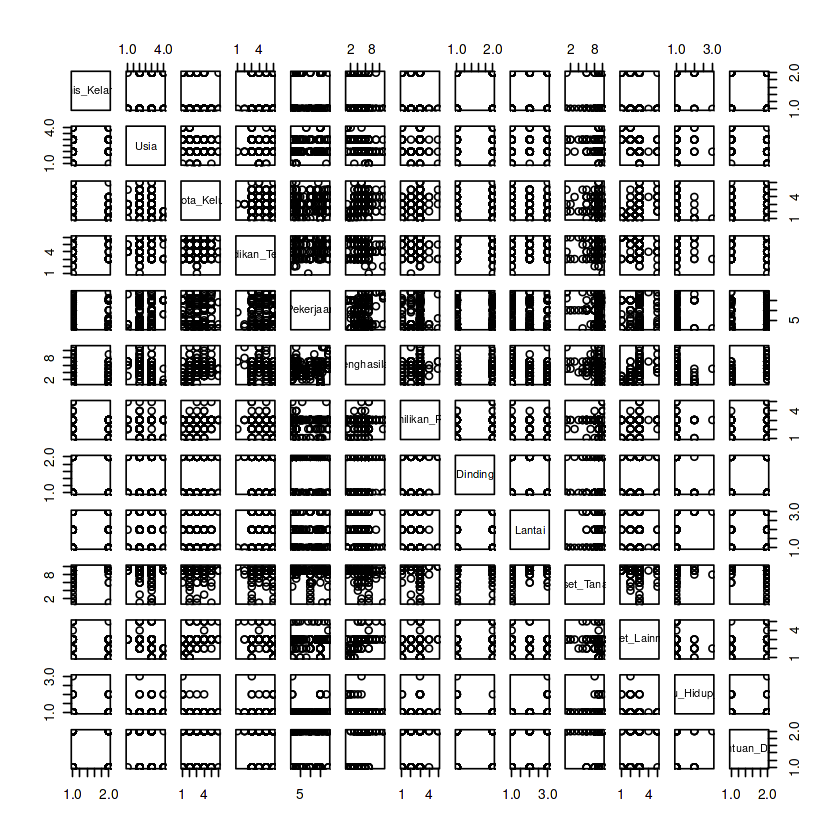

In [16]:
summary(data_training)
plot(data_training) 

#jml <- nrow(data_training[data_training$Bantuan_Desa == 'Layak' & data_training$Usia == '75-99', ])
#jml

In [17]:
#library(FSelector)

In [18]:
# Fungsi untuk menghitung entropi
entropy <- function(p) {
  # Menghindari log dari nol dengan menambahkan nilai kecil jika p adalah nol
  p <- ifelse(p == 0, 1e-15, p)
  -sum(p * log2(p))
}

# Fungsi untuk menghitung Gain Ratio
gain_ratio <- function(data, target, input) {
  # Menghitung entropi total
  total_entropy <- entropy(prop.table(table(data[[target]])))
  print(paste("Total entropy:", total_entropy))

  # Menghitung entropi untuk setiap nilai input dan menghitung weighted sum
  input_levels <- levels(factor(data[[input]]))
  weighted_entropy <- 0
  split_info <- 0
  for (level in input_levels) {
    subset <- data[data[[input]] == level, ]
    print(level)
    p <- prop.table(table(subset[[target]]))
    subset_entropy <- entropy(p)
    print(p)
    weighted_entropy <- weighted_entropy + (nrow(subset) / nrow(data)) * subset_entropy
    # Menghindari log dari nol dengan menambahkan nilai kecil jika proporsi adalah nol
    print(paste("Entropy:", entropy(p)))
    print(paste("Weighted entropy:", weighted_entropy))
    prop_subset <- nrow(subset) / nrow(data)
    prop_subset <- ifelse(prop_subset == 0, 1e-15, prop_subset)
    split_info <- split_info - prop_subset * log2(prop_subset)
  }

  # Menghitung Information Gain
  info_gain <- total_entropy - weighted_entropy
  print(paste("Info gain:", info_gain))

  # Menghindari pembagian dengan nol pada Gain Ratio
  gain_ratio <- ifelse(split_info == 0, 0, info_gain / split_info)
  print(paste("Gain ratio:", gain_ratio))

  return(gain_ratio)
}


In [19]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Jenis_Kelamin")

[1] "Total entropy: 0.956155023684403"
[1] "Laki-Laki"

      Layak Tidak Layak 
  0.3177843   0.6822157 
[1] "Entropy: 0.901955623947735"
[1] "Weighted entropy: 0.729648063712436"
[1] "Perempuan"

      Layak Tidak Layak 
  0.6296296   0.3703704 
[1] "Entropy: 0.950956048454973"
[1] "Weighted entropy: 0.91131655410124"
[1] "Info gain: 0.0448384695831627"
[1] "Gain ratio: 0.0637238399808709"


In [20]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Usia")

[1] "Total entropy: 0.956155023684403"
[1] "0-24"

      Layak Tidak Layak 
        0.1         0.9 
[1] "Entropy: 0.468995593589281"
[1] "Weighted entropy: 0.0110612168299359"
[1] "25-49"

      Layak Tidak Layak 
  0.2382979   0.7617021 
[1] "Entropy: 0.792198224158499"
[1] "Weighted entropy: 0.450133345785708"
[1] "50-74"

      Layak Tidak Layak 
  0.5454545   0.4545455 
[1] "Entropy: 0.994030211476956"
[1] "Weighted entropy: 0.836961140346316"
[1] "75-99"

      Layak Tidak Layak 
 0.92857143  0.07142857 
[1] "Entropy: 0.371232326640876"
[1] "Weighted entropy: 0.849218811508986"
[1] "Info gain: 0.106936212175417"
[1] "Gain ratio: 0.0827855906174179"


In [21]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Anggota_Keluarga")

[1] "Total entropy: 0.956155023684403"
[1] "1"

      Layak Tidak Layak 
  0.7142857   0.2857143 
[1] "Entropy: 0.863120568566631"
[1] "Weighted entropy: 0.0997474241975588"
[1] "2"

      Layak Tidak Layak 
  0.4226804   0.5773196 
[1] "Entropy: 0.982680802758599"
[1] "Weighted entropy: 0.324558834262616"
[1] "3"

      Layak Tidak Layak 
  0.2016129   0.7983871 
[1] "Entropy: 0.725142196417121"
[1] "Weighted entropy: 0.536628721894038"
[1] "4"

      Layak Tidak Layak 
  0.3697479   0.6302521 
[1] "Entropy: 0.950478326272379"
[1] "Weighted entropy: 0.80339032761671"
[1] "5"

      Layak Tidak Layak 
  0.4516129   0.5483871 
[1] "Entropy: 0.993233819739707"
[1] "Weighted entropy: 0.876008838022208"
[1] "6+"

      Layak Tidak Layak 
       0.25        0.75 
[1] "Entropy: 0.811278124459133"
[1] "Weighted entropy: 0.883662405234086"
[1] "Info gain: 0.0724926184503163"
[1] "Gain ratio: 0.0326660555064003"


In [22]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Pendidikan_Terakhir")

[1] "Total entropy: 0.956155023684403"
[1] "D3"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 1.17521041092713e-16"
[1] "S1"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 4.70084164370853e-16"
[1] "SD"

      Layak Tidak Layak 
  0.5137615   0.4862385 
[1] "Entropy: 0.999453501592748"
[1] "Weighted entropy: 0.256934980362287"
[1] "SMA"

      Layak Tidak Layak 
       0.07        0.93 
[1] "Entropy: 0.365923650900223"
[1] "Weighted entropy: 0.343237728216113"
[1] "SMP"

      Layak Tidak Layak 
  0.1935484   0.8064516 
[1] "Entropy: 0.708835673332196"
[1] "Weighted entropy: 0.498713477319638"
[1] "Tidak Sekolah"

      Layak Tidak Layak 
  0.6694915   0.3305085 
[1] "Entropy: 0.915445035449817"
[1] "Weighted entropy: 0.753483557940106"
[1] "Info gain: 0.202671465744297"
[1] "Gain ratio: 0.0983805994437832"


In [23]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Pekerjaan")

[1] "Total entropy: 0.956155023684403"
[1] "Buruh Harian Lepas"

      Layak Tidak Layak 
  0.5103448   0.4896552 
[1] "Entropy: 0.999691196626143"
[1] "Weighted entropy: 0.341875527148092"
[1] "Guru"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 0.341875527148092"
[1] "Karyawan Swasta"

      Layak Tidak Layak 
 0.07142857  0.92857143 
[1] "Entropy: 0.371232326640876"
[1] "Weighted entropy: 0.427679225286785"
[1] "Mekanik/Teknisi"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 0.427679225286785"
[1] "Pedagang"

      Layak Tidak Layak 
        0.2         0.8 
[1] "Entropy: 0.721928094887362"
[1] "Weighted entropy: 0.444705831298279"
[1] "Pedagang Kecil"

      Layak Tidak Layak 
  0.6666667   0.3333333 
[1] "Entropy: 0.91829583405449"
[1] "Weighted entropy: 0.464197959851323"
[1] "Penjahit"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98

In [24]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Penghasilan")

[1] "Total entropy: 0.956155023684403"
[1] "0-499.999"

      Layak Tidak Layak 
          1           0 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 4.4657995615231e-15"
[1] "500.000-999.999"

      Layak Tidak Layak 
  0.8461538   0.1538462 
[1] "Entropy: 0.619382194678764"
[1] "Weighted entropy: 0.0189904918179854"
[1] "1.000.000-1.499.999"

      Layak Tidak Layak 
  0.8181818   0.1818182 
[1] "Entropy: 0.684038435639042"
[1] "Weighted entropy: 0.107721892667389"
[1] "1.500.000-1.999.999"

      Layak Tidak Layak 
        0.5         0.5 
[1] "Entropy: 1"
[1] "Weighted entropy: 0.249231326629654"
[1] "2.000.000-2.499.999"

      Layak Tidak Layak 
  0.2596154   0.7403846 
[1] "Entropy: 0.826165427834159"
[1] "Weighted entropy: 0.451875676853127"
[1] "2.500.000-2.999.999"

      Layak Tidak Layak 
  0.1111111   0.8888889 
[1] "Entropy: 0.503258334775646"
[1] "Weighted entropy: 0.505287528421297"
[1] "3.000.000-3.499.999"

      Layak Tidak Layak 
 0.04210526  0.957894

In [25]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Kepemilikan_Rumah")

[1] "Total entropy: 0.956155023684403"
[1] "Milik Keluarga"

      Layak Tidak Layak 
  0.5769231   0.4230769 
[1] "Entropy: 0.982858689712706"
[1] "Weighted entropy: 0.0602696366333263"
[1] "Milik Orang tua"

      Layak Tidak Layak 
       0.25        0.75 
[1] "Entropy: 0.811278124459133"
[1] "Weighted entropy: 0.167419577599627"
[1] "Milik Sendiri"

      Layak Tidak Layak 
  0.3880597   0.6119403 
[1] "Entropy: 0.963535983577029"
[1] "Weighted entropy: 0.928703904246572"
[1] "Pinjam Pakai"

      Layak Tidak Layak 
       0.25        0.75 
[1] "Entropy: 0.811278124459133"
[1] "Weighted entropy: 0.93635747145845"
[1] "Sewa/Kontrak"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 0.936357471458451"
[1] "Info gain: 0.019797552225952"
[1] "Gain ratio: 0.0194997991988514"


In [26]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Dinding")

[1] "Total entropy: 0.956155023684403"
[1] "Kayu"

      Layak Tidak Layak 
  0.4811321   0.5188679 
[1] "Entropy: 0.998972561314118"
[1] "Weighted entropy: 0.499486280657059"
[1] "Tembok"

      Layak Tidak Layak 
  0.2735849   0.7264151 
[1] "Entropy: 0.846561846146152"
[1] "Weighted entropy: 0.922767203730135"
[1] "Info gain: 0.0333878199542674"
[1] "Gain ratio: 0.0333878199542674"


In [27]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Lantai")

[1] "Total entropy: 0.956155023684403"
[1] "Keramik"

      Layak Tidak Layak 
  0.2074468   0.7925532 
[1] "Entropy: 0.736573978887798"
[1] "Weighted entropy: 0.326594122714401"
[1] "Semen"

      Layak Tidak Layak 
  0.4336283   0.5663717 
[1] "Entropy: 0.987251684878504"
[1] "Weighted entropy: 0.589706010429663"
[1] "Tanah"

      Layak Tidak Layak 
  0.5853659   0.4146341 
[1] "Entropy: 0.978869850506778"
[1] "Weighted entropy: 0.873670613288941"
[1] "Info gain: 0.0824844103954621"
[1] "Gain ratio: 0.0533321134620644"


In [28]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Aset_Tanah")

[1] "Total entropy: 0.956155023684403"
[1] "1.0-5.0"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 4.70084164370853e-16"
[1] "0.9-1.0"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 7.0512624655628e-16"
[1] "0.7-0.8"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 8.22647287648993e-16"
[1] "0.6-0.7"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 9.40168328741706e-16"
[1] "0.5-0.6"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 1.29273145201985e-15"
[1] "0.4-0.5"

      Layak Tidak Layak 
        0.4         0.6 
[1] "Entropy: 0.970950594454669"
[1] "Weighted entropy: 0.022899778171102"
[1] "0.3-0.4"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233

In [29]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Aset_Lainnya")

[1] "Total entropy: 0.956155023684403"
[1] "Tidak Ada"

      Layak Tidak Layak 
       0.85        0.15 
[1] "Entropy: 0.6098403047164"
[1] "Weighted entropy: 0.0287660521092642"
[1] "Elektronik"

      Layak Tidak Layak 
  0.7540984   0.2459016 
[1] "Entropy: 0.804717519321077"
[1] "Weighted entropy: 0.144539091445551"
[1] "Sepeda Motor"

      Layak Tidak Layak 
   0.293578    0.706422 
[1] "Entropy: 0.873298419882363"
[1] "Weighted entropy: 0.818049901118977"
[1] "Mobil"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 0.818049901118978"
[1] "Sepeda Motor dan Mobil"

      Layak Tidak Layak 
 0.06666667  0.93333333 
[1] "Entropy: 0.353359335021421"
[1] "Weighted entropy: 0.830550820990018"
[1] "Info gain: 0.125604202694384"
[1] "Gain ratio: 0.115187761876278"


In [30]:
result <- gain_ratio(data_training, "Bantuan_Desa", "Perilaku_Hidup_Bersih")

[1] "Total entropy: 0.956155023684403"
[1] "Memiliki WC"

      Layak Tidak Layak 
   0.368932    0.631068 
[1] "Entropy: 0.94984855283656"
[1] "Weighted entropy: 0.922966046624205"
[1] "Memiliki WC Darurat"

      Layak Tidak Layak 
  0.7272727   0.2727273 
[1] "Entropy: 0.845350936622436"
[1] "Weighted entropy: 0.944897320923372"
[1] "Mengunakan MCK Umum"

      Layak Tidak Layak 
          0           1 
[1] "Entropy: 4.98289214233104e-14"
[1] "Weighted entropy: 0.944897320923372"
[1] "Info gain: 0.011257702761031"
[1] "Gain ratio: 0.0569967333491185"


In [31]:
data_training <- datafeed[indeks_training,]
head(data_training)

Jenis_Kelamin Usia  Anggota_Keluarga Pendidikan_Terakhir Pekerjaan         
1 Laki-Laki     25-49 2                SMP                 Satpam            
2 Laki-Laki     25-49 2                Tidak Sekolah       Buruh Harian Lepas
3 Laki-Laki     50-74 1                Tidak Sekolah       Tidak Bekerja     
4 Laki-Laki     25-49 3                SD                  Buruh Harian Lepas
5 Laki-Laki     25-49 6+               SD                  Buruh Harian Lepas
6 Laki-Laki     25-49 3                SMA                 Karyawan Swasta   
  Penghasilan         Kepemilikan_Rumah Dinding Lantai  Aset_Tanah Aset_Lainnya
1 3.000.000-3.499.999 Milik Orang tua   Tembok  Keramik 0-0.1      Sepeda Motor
2 2.000.000-2.499.999 Milik Sendiri     Kayu    Tanah   0.1-0.2    Sepeda Motor
3 500.000-999.999     Milik Keluarga    Kayu    Tanah   0-0.1      Tidak Ada   
4 1.500.000-1.999.999 Milik Sendiri     Kayu    Tanah   0.1-0.2    Sepeda Motor
5 2.000.000-2.499.999 Milik Sendiri     Kayu    Keramik 0.1-0.2    Sepeda Motor
6 3.000.000-3.499.999 Milik Sendiri     Tembok  Keramik 0.1-0.2    Sepeda Motor
  Perilaku_Hidup_Bersih
1 Memiliki WC          
2 Memiliki WC          
3 Memiliki WC Darurat  
4 Memiliki WC          
5 Memiliki WC          
6 Memiliki WC

In [32]:
write_xlsx(data_training, "data_training.xlsx")

In [33]:
str(class_training)

 Factor w/ 2 levels "Layak","Tidak Layak": 2 2 2 2 2 2 2 2 2 2 ...


In [34]:
str(data_testing)

tibble [51 × 12] (S3: tbl_df/tbl/data.frame)
 $ Jenis_Kelamin        : Factor w/ 2 levels "Laki-Laki","Perempuan": 1 1 1 2 1 2 1 1 1 1 ...
 $ Usia                 : Factor w/ 4 levels "0-24","25-49",..: 2 2 2 3 2 3 2 3 3 2 ...
 $ Anggota_Keluarga     : Factor w/ 6 levels "1","2","3","4",..: 5 4 2 1 3 1 2 4 2 3 ...
 $ Pendidikan_Terakhir  : Factor w/ 6 levels "D3","S1","SD",..: 4 4 3 3 6 6 6 6 6 5 ...
 $ Pekerjaan            : Factor w/ 19 levels "Buruh Harian Lepas",..: 1 3 10 5 4 1 14 1 10 3 ...
 $ Penghasilan          : Factor w/ 11 levels "0-499.999","500.000-999.999",..: 5 9 4 3 6 3 4 6 3 7 ...
 $ Kepemilikan_Rumah    : Factor w/ 5 levels "Milik Keluarga",..: 3 3 3 3 3 3 3 3 1 3 ...
 $ Dinding              : Factor w/ 2 levels "Kayu","Tembok": 2 1 2 2 2 1 2 2 1 2 ...
 $ Lantai               : Factor w/ 3 levels "Keramik","Semen",..: 1 1 3 1 1 3 1 1 3 1 ...
 $ Aset_Tanah           : Factor w/ 10 levels "1.0-5.0","0.9-1.0",..: 9 9 9 7 9 9 9 9 9 9 ...
 $ Aset_Lainnya         : Factor 

In [35]:
head(data_testing)

Jenis_Kelamin Usia  Anggota_Keluarga Pendidikan_Terakhir Pekerjaan         
1 Laki-Laki     25-49 5                SMA                 Buruh Harian Lepas
2 Laki-Laki     25-49 4                SMA                 Karyawan Swasta   
3 Laki-Laki     25-49 2                SD                  Petani            
4 Perempuan     50-74 1                SD                  Pedagang          
5 Laki-Laki     25-49 3                Tidak Sekolah       Mekanik/Teknisi   
6 Perempuan     50-74 1                Tidak Sekolah       Buruh Harian Lepas
  Penghasilan         Kepemilikan_Rumah Dinding Lantai  Aset_Tanah Aset_Lainnya
1 2.000.000-2.499.999 Milik Sendiri     Tembok  Keramik 0.1-0.2    Sepeda Motor
2 4.000.000-4.499.999 Milik Sendiri     Kayu    Keramik 0.1-0.2    Sepeda Motor
3 1.500.000-1.999.999 Milik Sendiri     Tembok  Tanah   0.1-0.2    Sepeda Motor
4 1.000.000-1.499.999 Milik Sendiri     Tembok  Keramik 0.3-0.4    Elektronik  
5 2.500.000-2.999.999 Milik Sendiri     Tembok  Keramik 0.1-0.2    Sepeda Motor
6 1.000.000-1.499.999 Milik Sendiri     Kayu    Tanah   0.1-0.2    Elektronik  
  Perilaku_Hidup_Bersih
1 Memiliki WC          
2 Memiliki WC          
3 Memiliki WC          
4 Memiliki WC          
5 Memiliki WC          
6 Memiliki WC

In [36]:
write_xlsx(data_testing, "data_testing.xlsx")

In [37]:
library("C50")

control_ops <- C5.0Control(subset = TRUE,
                           #winnow = TRUE,
                           noGlobalPruning = TRUE,
                           CF = 0.5,
                           minCases =1,
                           #seed = 100,
                           #earlyStopping = FALSE,
                           label = "Bantuan_Desa")

# Membangun model C5.0
model_bantuan_desa <- C5.0(
    x = data_training, 
    y = class_training,
    control = control_ops,
    trials = 1
)


# Melihat overview dari model diatas
summary(model_bantuan_desa)


Call:
C5.0.default(x = data_training, y = class_training, trials = 1, control
 = control_ops)


C5.0 [Release 2.07 GPL Edition]  	Wed Jul 31 07:43:52 2024
-------------------------------

Class specified by attribute `Bantuan_Desa'

Read 424 cases (13 attributes) from undefined.data

Decision tree:

Penghasilan in {0-499.999,500.000-999.999,1.000.000-1.499.999}:
:...Penghasilan = 0-499.999: Layak (38)
:   Penghasilan in {500.000-999.999,1.000.000-1.499.999}:
:   :...Anggota_Keluarga in {2,3,4,5,6+}: Layak (49/4)
:       Anggota_Keluarga = 1:
:       :...Dinding = Tembok:
:           :...Penghasilan = 500.000-999.999: Layak (1)
:           :   Penghasilan = 1.000.000-1.499.999: Tidak Layak (5)
:           Dinding = Kayu:
:           :...Perilaku_Hidup_Bersih in {Memiliki WC,
:               :                         Mengunakan MCK Umum}: Layak (10/1)
:               Perilaku_Hidup_Bersih = Memiliki WC Darurat:
:               :...Jenis_Kelamin = Laki-Laki: Tidak Layak (1)
:            

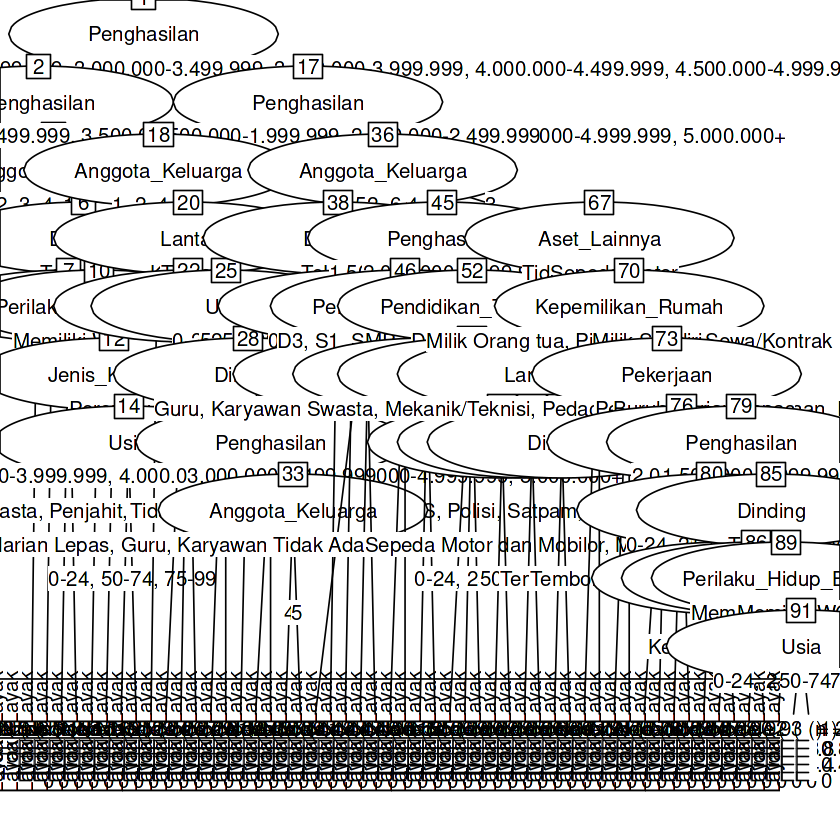

In [38]:
plot(model_bantuan_desa, 0)

In [39]:
png("plot.png", width=2600, height=1200)
plot(model_bantuan_desa, 0)
dev.off()

png 
  2

#  **Evaluasi**

In [40]:
data_testing$Bantuan_Desa <- df[!indeks_training,]$Bantuan_Desa
data_testing$hasil_prediksi <- predict(model_bantuan_desa, data_testing)
data_testing

Jenis_Kelamin Usia  Anggota_Keluarga Pendidikan_Terakhir Pekerjaan         
1  Laki-Laki     25-49 5                SMA                 Buruh Harian Lepas
2  Laki-Laki     25-49 4                SMA                 Karyawan Swasta   
3  Laki-Laki     25-49 2                SD                  Petani            
4  Perempuan     50-74 1                SD                  Pedagang          
5  Laki-Laki     25-49 3                Tidak Sekolah       Mekanik/Teknisi   
6  Perempuan     50-74 1                Tidak Sekolah       Buruh Harian Lepas
7  Laki-Laki     25-49 2                Tidak Sekolah       Sopir             
8  Laki-Laki     50-74 4                Tidak Sekolah       Buruh Harian Lepas
9  Laki-Laki     50-74 2                Tidak Sekolah       Petani            
10 Laki-Laki     25-49 3                SMP                 Karyawan Swasta   
11 Laki-Laki     25-49 3                SD                  Buruh Harian Lepas
12 Perempuan     50-74 1                Tidak Sekolah       Buruh Harian Lepas
13 Laki-Laki     25-49 1                SMP                 Mekanik/Teknisi   
14 Perempuan     75-99 1                Tidak Sekolah       Tidak Bekerja     
15 Perempuan     50-74 1                Tidak Sekolah       Pedagang          
16 Laki-Laki     50-74 4                SD                  Petani            
17 Laki-Laki     25-49 4                SMP                 Sopir             
18 Laki-Laki     25-49 3                SMP                 Karyawan Swasta   
19 Laki-Laki     25-49 3                SMA                 Karyawan Swasta   
20 Laki-Laki     50-74 1                SMP                 Buruh Harian Lepas
21 Laki-Laki     50-74 3                SMP                 Pedagang          
22 Perempuan     50-74 1                Tidak Sekolah       Pedagang Kecil    
23 Perempuan     25-49 2                SD                  Pedagang Kecil    
24 Laki-Laki     25-49 4                SMA                 Buruh Harian Lepas
25 Perempuan     50-74 2                Tidak Sekolah       Buruh Harian Lepas
26 Laki-Laki     25-49 3                SMA                 Karyawan Swasta   
27 Laki-Laki     50-74 1                Tidak Sekolah       Buruh Harian Lepas
28 Laki-Laki     25-49 3                SMA                 Sopir             
29 Laki-Laki     25-49 3                SMP                 Buruh Harian Lepas
30 Laki-Laki     25-49 2                SD                  Buruh Harian Lepas
31 Laki-Laki     50-74 2                Tidak Sekolah       Buruh Harian Lepas
32 Laki-Laki     25-49 4                SMA                 Wirausaha         
33 Perempuan     50-74 3                SMP                 Wirausaha         
34 Laki-Laki     25-49 1                SMA                 Wirausaha         
35 Perempuan     25-49 2                S1                  Karyawan Swasta   
36 Perempuan     25-49 2                SMA                 Wirausaha         
37 Laki-Laki     25-49 4                SMP                 Karyawan Swasta   
38 Laki-Laki     50-74 1                Tidak Sekolah       Petani            
39 Laki-Laki     25-49 2                S1                  Karyawan Swasta   
40 Laki-Laki     25-49 4                SMA                 Buruh Harian Lepas
41 Laki-Laki     25-49 5                SMP                 Karyawan Swasta   
42 Perempuan     50-74 1                Tidak Sekolah       Buruh Harian Lepas
43 Laki-Laki     25-49 4                SMP                 Buruh Harian Lepas
44 Laki-Laki     50-74 2                Tidak Sekolah       Buruh Harian Lepas
45 Laki-Laki     0-24  3                SMA                 Karyawan Swasta   
46 Perempuan     50-74 1                SD                  Buruh Harian Lepas
47 Laki-Laki     25-49 4                SMP                 Buruh Harian Lepas
48 Laki-Laki     50-74 2                Tidak Sekolah       Buruh Harian Lepas
49 Laki-Laki     50-74 2                SMA                 Buruh Harian Lepas
50 Laki-Laki     25-49 3                Tidak Sekolah

In [41]:
write_xlsx(data_testing, "hasilprediksi.xlsx")

In [42]:
library("reshape2")

# Menggunakan dcast untuk membuat confusion matrix
#dcast(hasil_prediksi ~ Bantuan_Desa, data=input_testing_set)
confusion_matrix <- dcast(data_testing, Bantuan_Desa ~ hasil_prediksi, value.var = 'hasil_prediksi', fun.aggregate = length)
print(confusion_matrix)

  Bantuan_Desa Layak Tidak Layak
1        Layak    11           6
2  Tidak Layak     3          31


In [43]:
# Menghitung jumlah prediksi yang benar
jumlah_benar <- nrow(data_testing[data_testing$Bantuan_Desa == data_testing$hasil_prediksi, ])
print(paste("jumlah_benar:",jumlah_benar))

# Menghitung jumlah prediksi yang salah
jumlah_salah <- nrow(data_testing[data_testing$Bantuan_Desa != data_testing$hasil_prediksi, ])
print(paste("jumlah_salah:", jumlah_salah))

# Menghitung akurasi
akurasi <- jumlah_benar / (jumlah_benar + jumlah_salah)*100

# Menghitung presisi dan recall
# Presisi: Jumlah prediksi positif benar dibagi dengan jumlah semua prediksi positif
# Recall: Jumlah prediksi positif benar dibagi dengan jumlah semua kasus positif sebenarnya

presisi <- nrow(data_testing[data_testing$Bantuan_Desa == 'Layak' & data_testing$hasil_prediksi == 'Layak', ]) / 
           nrow(data_testing[data_testing$Bantuan_Desa == 'Layak', ])

recall <- nrow(data_testing[data_testing$Bantuan_Desa == 'Layak' & data_testing$hasil_prediksi == 'Layak', ]) / 
            nrow(data_testing[data_testing$hasil_prediksi == 'Layak', ])

# Menampilkan hasil
print(paste("Akurasi:", akurasi))
print(paste("Presisi:", presisi))
print(paste("Recall:", recall))

[1] "jumlah_benar: 42"
[1] "jumlah_salah: 9"
[1] "Akurasi: 82.3529411764706"
[1] "Presisi: 0.647058823529412"
[1] "Recall: 0.785714285714286"
